In [6]:
import numpy as np
import matplotlib.pyplot as plt

In [269]:
x_ = np.random.randn(200, 1) # standared normal distribution
g_err = np.random.randn(200, 1) # gaussian error
y_ = 2*x_ + 0.6*g_err

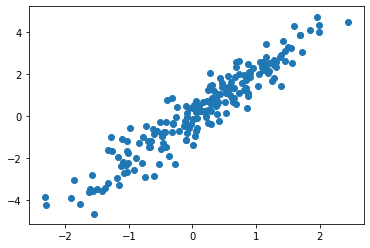

In [270]:
plt.scatter(x_, y_);

In [325]:
x = ((x_ - np.mean(x_))/np.std(x_))   # normal standard distribution
y = y_

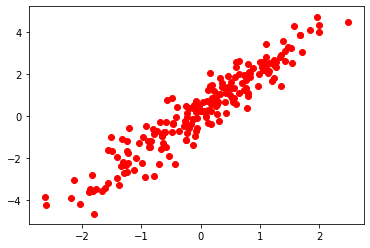

In [326]:
plt.scatter(x, y, color = "red")

In [351]:
# gradient descent
# hypothesis
# y = w.x + b   a-> weight, b-> bias

# hypothesis function
def hypothesis(x, w, b):
    #print(x.shape, w.shape)
    return np.dot(x, w) + b

def mse(x, y, w, b):
    
    y_ = hypothesis(x, w, b)
    
    # mse
    l = 0
    for i in range(y_.shape[0]):
        e = (y_[i] - y[i])**2
        l += e
    
    return l/x.shape[0]


def grad(x, y, w, b):

    m = x.shape[0]
    
    y_ = hypothesis(x, w, b)
    
#     #print(x.shape, y_.shape)
#     grad_b = np.sum(y -  y_)/m
#     grad_w = np.sum((y - y_))

    grad_b, grad_w = 0.0, 0.0

    for i in range(y_.shape[0]):
        d = y_[i] - y[i]
        #print(d)
        grad_b += d
        grad_w += d*x[i]
    
    #print('grad_w_shape ', grad_w.shape)
    
    return grad_w/m, grad_b/m

def fit(x, y, learning_rate = 0.01, maxItr = 1000):
    
    w = np.zeros((x.shape[1], 1))
    b = 0
    
    error = []
    
    for i in range(maxItr):
        
        #print(w.shape)
        
        grad_w, grad_b = grad(x, y, w, b)
        
        #print(grad_w, grad_b)
        w = w - learning_rate*grad_w
        
        b = b - learning_rate*grad_b
        
        e = mse(x, y, w, b)
        
        error.append(e)
    
    return error, w, b

In [352]:
error, w, b = fit(x, y)

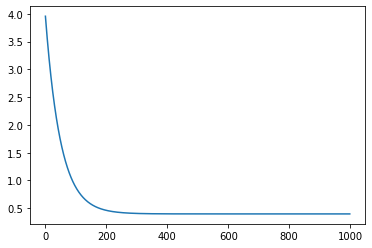

In [353]:
plt.plot(error)

In [354]:
error[-5]

array([0.39782722])